# Choosing color palettes

Seaborn makes it easy to use colors that are well-suited to the characteristics of your data and your visualisation goals. This chapter discusses both the general principles that should guide your choices and the tools in seaborn that help you quickly find the best solution for a given application.

## General principles for using color in plots

### Components of color 

Because of the way our eyes work, a particular color can be defined using three components. We usually program colors in a computer by specifying their RGB values, which set the intensity of the red, green, blue channels in a display. But for analysing the perceptual attributes of a color, it's better to think in terms of __hue__, __saturation__, and __luminance__ channels. 

__Hue__ is the component that distinguishes "different colors" in a non-technical sense. It's property of color that leads to first-order names like "red" and "blue":

![hue-color](figs/hue_color.png)

__Saturation__ (or chroma) is the colorfulness. Two colors with different hues will look more distinct when they have more saturation:

![saturation-color](figs/saturation_color.png)

__Lightness__ corresponds to how much light is emitted, ranging from black to white.

![lightness-color](figs/lightness_color.png)

### Vary hue to distinguish categories

When you want to represent multiple categories in a plot, you typically should vary the color of the elements. Consider this simple example: in which of these two plots is it easier to count the number of triangular points?

![hue-distinguish](figs/hue_to_distinguish_colors.png)

In the plot on the right, the orange triangles "pop out", making it easy to distinguish them from the circles. This pop-out effect happens because our visual system prioritises color differences. 

The blue and orange colors differ mostly in terms of their hue. Hue is useful for representing categories: most people can distinguish a moderate number of hues relatively easily, and points that have different hues but similar brightness or intensity seem equally imprtant. It also makes plots easier to talk about. Consider this example:

![hue-to-distinguish-colors](figs/hue_to_distinguish_colors_02.png)

If the left plot represents five distinct categories, it would be easy to understand. But if we use the right plot to represent 5 distinct categories, it would difficult to distinguish them from each other. 

As a general rule, use hue variation to represent categories. With that said, here are few notes of caution. 

If you have more than a handful of colors in your plot, it can become difficult to keep in mind what each one means and the viewer will have to continually refer to the legend to make sense of what is shown. So we should strive not to make plots that are too complex. And be mindful that not everyone sees colors the same way. Varying both __shape and color__ can help people with anomalour color vision understand your plots, and it can keep them interpretable if they are printed to black-and-white.  

### Vary luminance to represent numbers

On the other hand, hue variation are not well suited to representing numeric data. Consider this example, where we need colors to represent the counts in a bivariate histogram. On the left, we use a circular colormap where gradual changes in the number of observation within each bin correspond to gradual changes in hue. On the right, we use a palette that uses brighter colors to represent bins with larger counts:

![heat-map](figs/heat_map.png)

These examples show that color palette choices are about more than aesthetics: the colors you choose can reveal patterns in your data if used effectively. There is not one optimal palette, but there are palettes that are better or worse for particular datasets and visualisation approaches. 

And aesthetics do matter: the more that people want to look at your figures, the greater the chance that they will learn something from them. This is true even when you are making plots for yourself. During exploratory data analysis, you may generate many similar figures. Varing the color palettes will add a sense of novelty, which keeps you engaged and prepared to notice interesting features of your data. 

So how can you choose color palettes that both represent your data well and look attractive?

## Tools for choosing color palettes

The most important function for working with color palettes is `color_palette()`. This function provides an interface to most of the possible ways that one can generate color palettes in seaborn. And it's used internally by any function that has a `palette` argument. 

Calling `color_palette()` with no arguments will return the current default color palette that seaborn and matplotlib functions will use if colors are not otherwise specified. This default palette can be set with the corresponding `set_palette()` function.

Broadly, color palettes fall into one of three categories:

* Qualitative palettes, good for representing categorical data
* Sequential palette, good for representing numeric data
* Diverging palettes, good for representing numeric data with a categorical boundary

## Qualitative color palettes

Qualitative palettes are well-suited to representing categorical data because most of their variation is in the hue component. The default color palette in seaborn is a qualitative palette with ten distinct hues:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

These colors have the same ordering as the default matplotlib color palette, `"tab10"`, but they are a bit less intense. Compare:

In [2]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Seaborn has six variations of matplotlib's palette, called `deep`, `muted`, `pastel`, `bright`, `dark`, and `colorblind`. These span a range of average luminance and saturation values:

![6-palette](figs/6_palettes.png)

### Using circular color systems

When you have an arbitrary number of categories, the easiest approach to finding unique hues is to draw evenly-spaced colors in a circular color space (one where the hue changes while keeping the brightness and saturation constant). This is what most seaborn functions default to when they need to use more colors than are currently set in the default color cycle.

The most common way to do this uses the `hls` color space, which is a simple transformation of RGB values:

In [3]:
sns.color_palette("hls", 10)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

Because of the way the human visual system works, colors that have the same luminance and saturation in terms of their RGB values won't necessarily look equally intense. To remedy this, seaborn created the husl system, which achieves less intensity variation as you rotate around the color wheel:

In [4]:
sns.color_palette("husl", 15)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9542900080364486, 0.4779505175890752, 0.1963917622115608),
 (0.7930046244373694, 0.5708100522446624, 0.19489531984381053),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5571803870240879, 0.6507747739933957, 0.19331667588333168),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20774052347943134, 0.6813852191365138, 0.6002900398972028),
 (0.21316806282417172, 0.6731234926210208, 0.6838056741516414),
 (0.21979956608283252, 0.6625157876850336, 0.7732093159317208),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.5830408541921136, 0.5695319215803094, 0.9583591966369759),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.959647907830888, 0.3748291312853892, 0.893004453766301),
 (0.9642903119819891, 0.41420146582831974, 0.7188681186026104)]

When seaborn needs a categorical palette with more colors than are available in the current default, it will use this approach. 

### Using categorical color brewer palettes

Another source of visually pleasing categorical palettes comes from the [Color Brewer](https://colorbrewer2.org/) tool which also has sequential and diverging palettes, as we'll see below. 

In [5]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

Be aware that the qualitative Color Brewer palettes have different lengths, and the default behaviour of `color_palette()` is to give you the full list:

In [6]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

## Sequential color palettes

The second major class of color palettes is called "sequential". This kind of mapping is appropriate when data range from relatively low or uninteresting values (vice versa). As we saw above, the primary dimension of variation in a sequential palette is luminance. Some seaborn functions will default to a sequential palette when you are mapping numeric data. 

For historical reasons, both categorical and numeric mappings are specified with the `hue` parameter in functions like `relplot()` or `displot()`, even though numeric mappings use color palettes with relatively little hue variation.

### Perceptually uniform palettes 

Seaborn includes four perceptually uniform sequential colormaps: `"rocket"`, `"mako"`, `"flare"`, and `"crest"`. The first two has a very wide luminance range and are well suited for applications such as heatmaps, where colors fill the space they are plotted into:

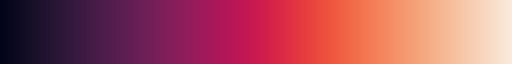

In [7]:
sns.color_palette("rocket", as_cmap=True)

In [8]:
sns.color_palette("mako", as_cmap=False)

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

__What does `as_cmap=True` mean?__

Because the extreme values of these colormaps approach white, they are not well-suited for coloring elements such as lines or points: it will be difficult to discriminate important values against a white or grey background. 

The "flare" and "crest" colormaps are a better choice for such plots. They have a more restricted range of luminance variations, which they compensate for with a slightly more pronounced variation in hue.

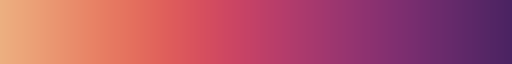

In [9]:
sns.color_palette("flare", as_cmap=True)

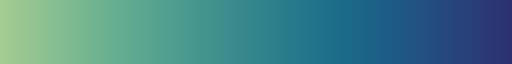

In [10]:
sns.color_palette("crest", as_cmap=True)

It is also possible to use the perceptually uniform colormaps provided by matplotlib, such as `"magma"` and `"viridis"`:

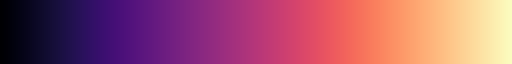

In [11]:
sns.color_palette("magma", as_cmap=True)

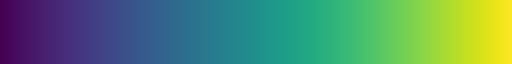

In [12]:
sns.color_palette("viridis", as_cmap=True)

As with the convention in matplotlib, every continuous colormap has a reversed version, which has the suffix `"_r"`:

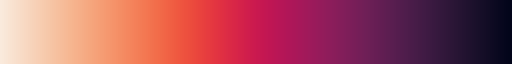

In [13]:
sns.color_palette("rocket_r", as_cmap=True)

## Other color palettes

There are many other more color palettes, we will not cover it in very detail here but show some examples:

### Sequential "cubehelix" palettes

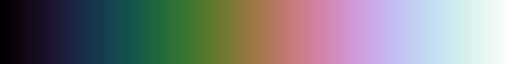

In [14]:
sns.color_palette("cubehelix", as_cmap=True)

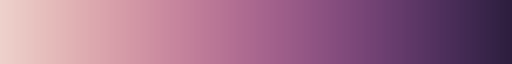

In [15]:
sns.cubehelix_palette(as_cmap=True)

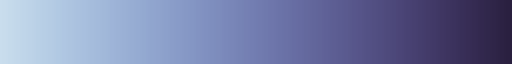

In [16]:
sns.cubehelix_palette(start=.2, rot=-.2, as_cmap=True)

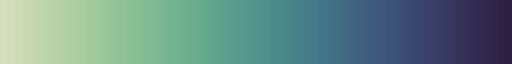

In [17]:
sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True)

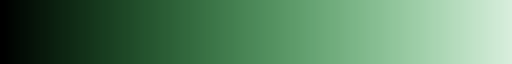

In [18]:
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.9, reverse=True, as_cmap=True)

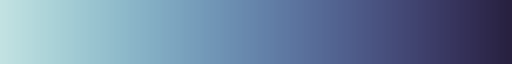

In [19]:
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

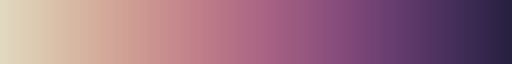

In [20]:
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

### Custom sequential palettes

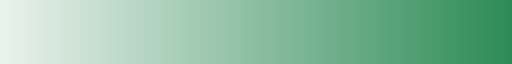

In [21]:
sns.light_palette("seagreen", as_cmap=True)

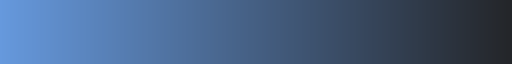

In [22]:
sns.dark_palette("#69d", reverse=True, as_cmap=True)

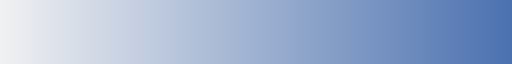

In [23]:
sns.color_palette("light:b", as_cmap=True)

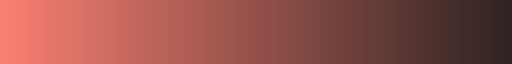

In [24]:
sns.color_palette("dark:salmon_r", as_cmap=True)

### Sequential color brewer palettes

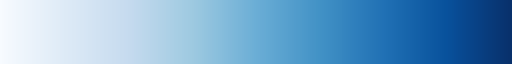

In [25]:
sns.color_palette("Blues", as_cmap=True)

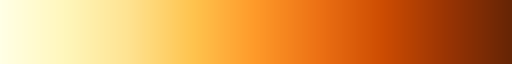

In [26]:
sns.color_palette("YlOrBr", as_cmap=True)

### Perceptually uniform diverging palettes

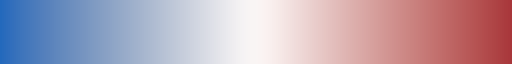

In [27]:
sns.color_palette("vlag", as_cmap=True)

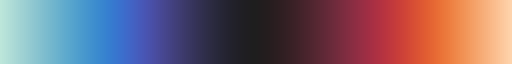

In [28]:
sns.color_palette("icefire", as_cmap=True)

### Custom diverging palettes

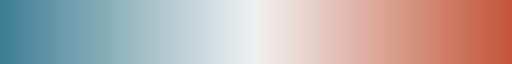

In [29]:
sns.diverging_palette(220, 20, as_cmap=True)

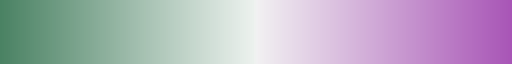

In [30]:
sns.diverging_palette(145, 300, s=60, as_cmap=True)

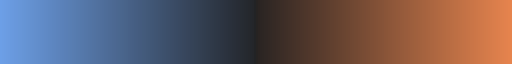

In [31]:
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

### Other diverging palettes

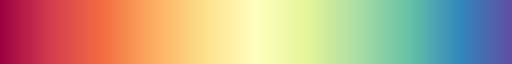

In [32]:
sns.color_palette("Spectral", as_cmap=True)

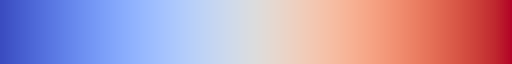

In [33]:
sns.color_palette("coolwarm", as_cmap=True)

# References

* [Seaborn Tutorial](https://seaborn.pydata.org/index.html)